--- 
<strong> 
    <h1 align='center'>Seaborn - Matrix Plots</h1> 
</strong>

---

# __Matrix Plots__

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set_theme(style='whitegrid')
#plt.style.use('ggplot') # style
%matplotlib inline

In [3]:
flights = sns.load_dataset('flights')

In [4]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [7]:
print(flights.shape)
print('--------------------------------------------')
print(flights.isna().sum())
print('--------------------------------------------')
print(flights.info())
print('--------------------------------------------')
print(flights.describe())

(144, 3)
--------------------------------------------
year          0
month         0
passengers    0
dtype: int64
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None
--------------------------------------------
              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000


In [5]:
tips = sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
print(tips.shape)
print('--------------------------------------------')
print(tips.isna().sum())
print('--------------------------------------------')
print(tips.info())
print('--------------------------------------------')
print(tips.describe())

(244, 7)
--------------------------------------------
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB
None
--------------------------------------------
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.07

## **Heatmap**

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [ ]:
#total_bill--float64 
#tip--float64 
#sex--category
#smoker--category
#day--category
#time--category
#size--int64 


# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


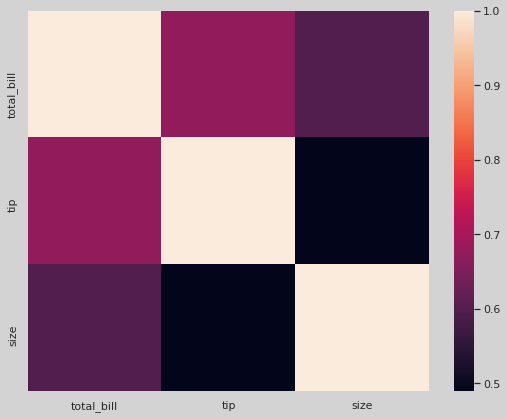

In [12]:
sns.set_style()
plt.figure(figsize=(9, 7), facecolor='lightgrey')
sns.heatmap(tips.corr())

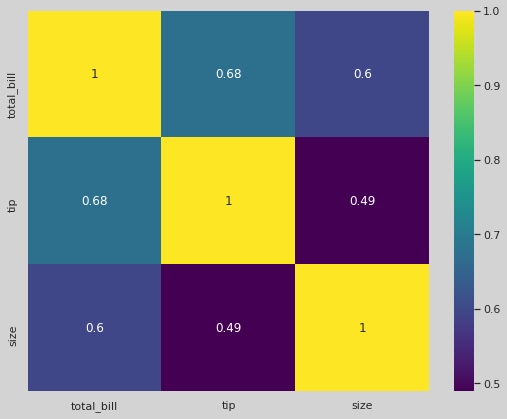

In [18]:
sns.set_style()
plt.figure(figsize=(9, 7), facecolor='lightgrey')
sns.heatmap(tips.corr(), cmap='viridis', annot=True) # cmap-coolwarm-rainbow-tab10

**For flights data:**

In [19]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


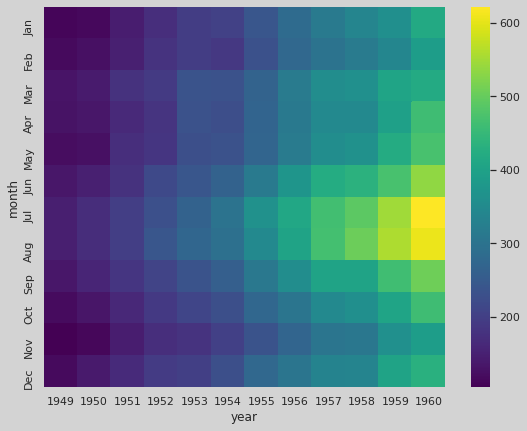

In [24]:
# year-->int64   
# month-->category
# passengers-->int64  

sns.set_style()
plt.figure(figsize=(9, 7), facecolor='lightgrey')
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights, cmap='viridis')

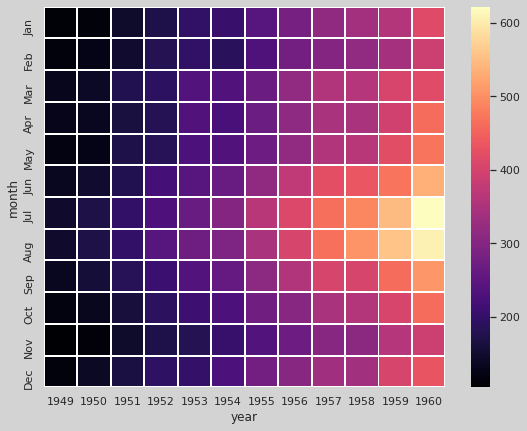

In [25]:
# year-->int64   
# month-->category
# passengers-->int64

sns.set_style()
plt.figure(figsize=(9, 7), facecolor='lightgrey')
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights, cmap='magma', linecolor='white', linewidths=1)

## **clustermap**

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

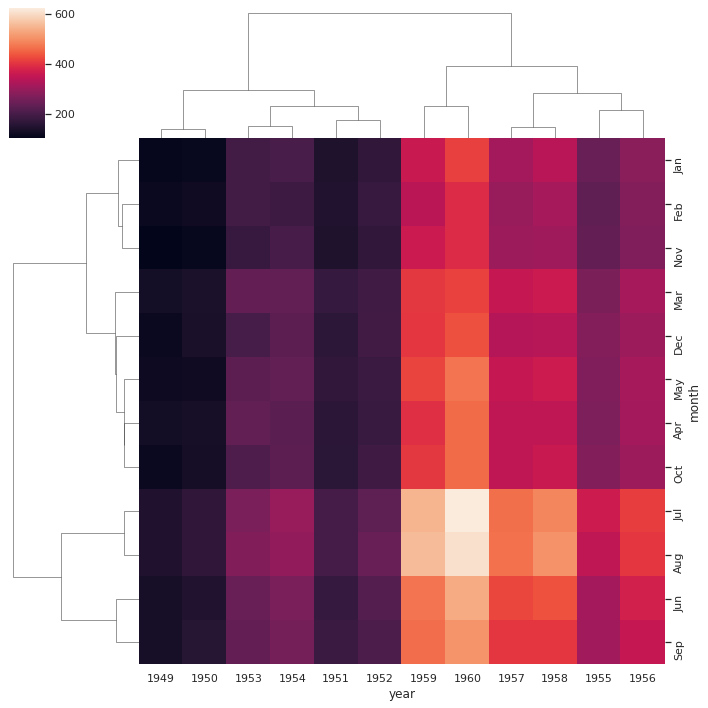

In [30]:
# year-->int64   
# month-->category
# passengers-->int64

sns.set_style()
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.clustermap(pvflights)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

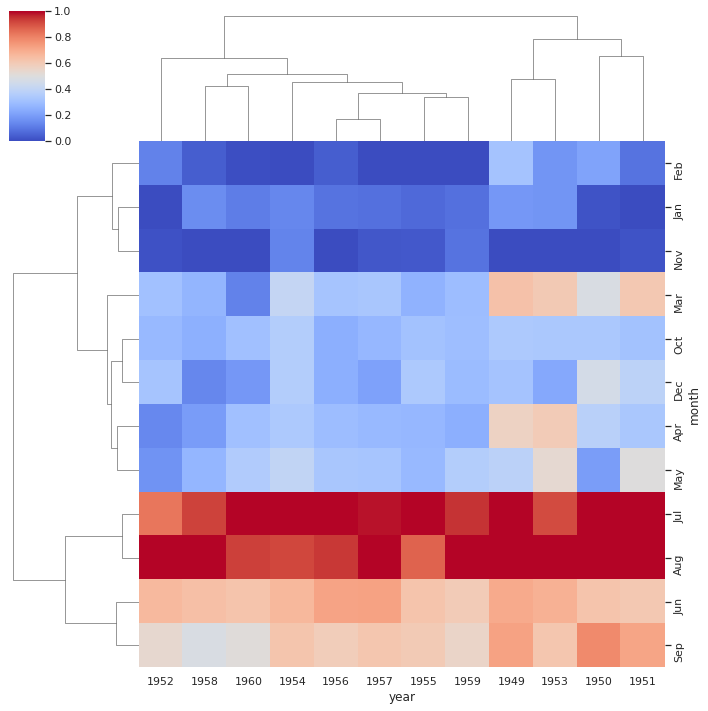

In [31]:
# year-->int64   
# month-->category
# passengers-->int64

# More options to get the information a little clearer like normalization
sns.set_style()
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

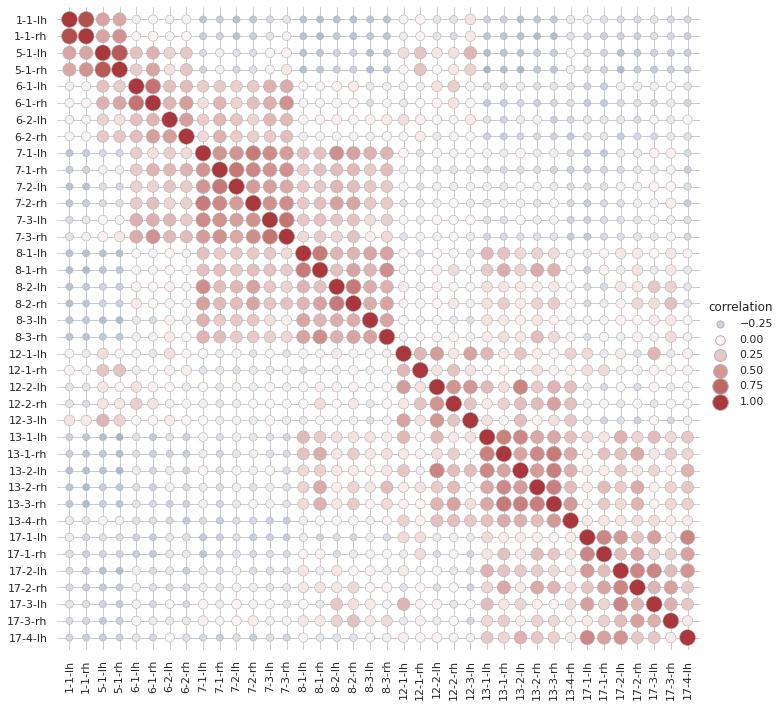

In [9]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")